Hello,

In this study, we will try to make an estimation on 2 sets of highly correlated columns on an existing dataset.

**Let's start!**

Firstly, we define our libraries and our database!

In [ ]:
import numpy as np  # for mathematical operations
import pandas as pd # for data processing and csv file reading
import matplotlib.pyplot as plt # for data visualization.
#from sklearn.linear_model import LinearRegression # Regresyon tahmini için
from sklearn import svm,datasets   #to make the guess.
from sklearn.model_selection import train_test_split  #to make the guess.
from sklearn.preprocessing import PolynomialFeatures  #to make the guess.
import seaborn as sns  # to draw a heat map
import os
print(os.listdir("../input"))
data=pd.read_csv('../input/kc_house_data.csv')   #import data


We are calling the info function to obtain information about the database we have defined.

In [ ]:
data.info()

Let us check with the heat map on our table for empty data.

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(pd.isnull(data.T), cbar=False)
plt.show()

When we look at the heat map, we see that there is no empty value .So there is no need to do the missing data filling process.

Let's see the columns of our database

In [ ]:
data.columns

We call the 'shape' function to find out how many of our data and the number of columns.

In [ ]:


data.shape

We are calling the head and tail functions to display the first 10 and end 10 values of our data.

In [ ]:
data.head(10)

In [ ]:
data.tail(10)

When we examine the tables 'id', 'date', 'lat', 'long', 'zipcode' columns will not work for us, we're removing it from the table ** (Attribute Extracting!) **.

In [ ]:

data.drop(["id","date","lat","long","zipcode"],axis=1,inplace=True)

data.head()


We use a histogram to see the distribution of our data.

In [ ]:
# Histogram
# bins = number of bar in figure
data.plot(kind = 'hist',bins = 50,figsize=(8, 12))
plt.show()

In [ ]:
data.hist(figsize=(12, 12))
plt.show()

We call the describe function to see the mathematical ratios (total number, average, standard deviation, minimum value, lower end value, median, upper end value, maximum value) of our database.

In [ ]:
data.describe()

We are calling the corr function to examine the correlation in our data.

In [ ]:
data.corr()

Simple (Dual) Correlation Definition:
When there are two measurements of an individual, it determines the relationship between these two variables. As a result of the correlation analysis, whether there is a linear relationship and the degree of this relationship, if any, is calculated by the correlation coefficient. The correlation coefficient is indicated by -1 r “and values between -1 and +1.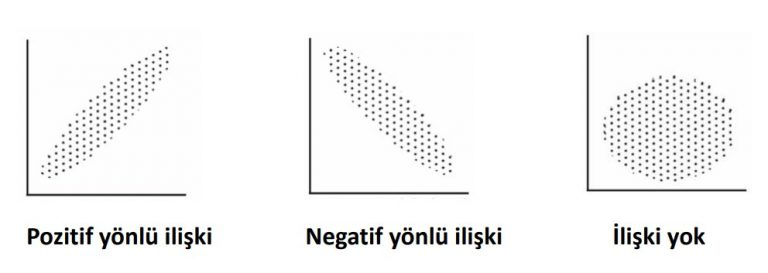


               The distribution of the data relationship is as follows.
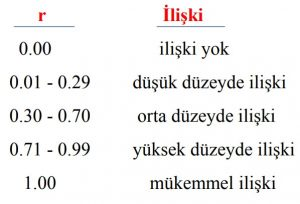

After the Corr function, we use the heatmap library to view the correlation distribution in detail by subtracting our heat map.

In [ ]:
#correlation map
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(data.corr(), annot=True, linewidths=.5,linecolor='w',cmap="BuPu", fmt= '.2f',ax=ax)
plt.show()


** 'price' ** and ** 'sqft_living' ** We use the Scatter plot to examine the distribution between columns.

In [ ]:
# Scatter Plot 
# x = sqft_living, y = price
data.plot(kind='scatter', x='sqft_living', y='price',alpha = 0.3,color = 'red',)
plt.xlabel('sqft_living')              #Name of 'X'
plt.ylabel('price')                    #Name of 'Y' 
plt.title('sqft_living-price Scatter Plot') #Name of Title
plt.show()


** We use the Scatter plot to examine the distribution between 'sqft_living' ** and ** 'grade' ** columns.

In [ ]:
# Scatter Plot 
# x = sqft_living, y = price
data.plot(kind='scatter', x='grade', y='sqft_living',alpha = 0.3,color = 'green',)
plt.xlabel('grade')              #Name of 'X'
plt.ylabel('sqft_living')        #Name of 'Y' 
plt.title('sqft_living-price Scatter Plot') #Name of Title
plt.show()

** 'sqft_living' ** and ** 'sqft_above' ** We use the Scatter plot to examine the distribution between columns.

In [ ]:
# Scatter Plot 
# x = sqft_above, y = sqft_living
data.plot(kind='scatter', x='sqft_above', y='sqft_living',alpha = 0.3,color = 'darkblue',)
plt.xlabel('sqft_above')             #Name of 'X'
plt.ylabel('sqft_living')            #Name of 'Y'
plt.title('sqft_above-sqft_living Scatter Plot') #Name of Title
plt.show()

Let's do min-max Normalization using some Columns.

In [ ]:
def minmax(data):
    l = np.min(data)
    h = np.max(data)
    return (data -l) / (h-l)
dataMinmax=pd.DataFrame()
dataMinmax["Min-Max_Normalization_price"]=minmax(data.price)
dataMinmax["Min-Max_Normalization_sqft_above"]=minmax(data.sqft_above)
dataMinmax["Min-Max_Normalization_sqft_living"]=minmax(data.sqft_living)
dataMinmax["Min-Max_Normalization_grade"]=minmax(data.grade)

dataMinmax.head()

Let's make the standard deviation Normalization using some Columns.

In [ ]:
def standard_norm(arr):
    mean = np.mean(arr)
    stdev = np.std(arr)
    return (arr-mean)/stdev

dataStandard_norm=pd.DataFrame()
dataStandard_norm["Standart_Deviation_Normalization_price"]=standard_norm(data.price)
dataStandard_norm["Standart_Deviation_Normalization_sqft_above"]=standard_norm(data.sqft_above)
dataStandard_norm["Standart_Deviation_Normalization_sqft_living"]=standard_norm(data.sqft_living)
dataStandard_norm["Standart_Deviation_Normalization_grade"]=standard_norm(data.grade)
dataStandard_norm.head(10)

Let's do logarithm normalization using some columns.

In [ ]:
dataLogaritmik_Norm=pd.DataFrame()
dataLogaritmik_Norm["Logarithm_Normalization_price"]=np.log(data.price)
dataLogaritmik_Norm["Logarithm_Normalization_sqft_above"]=np.log(data.sqft_above)
dataLogaritmik_Norm["Logarithm_Normalization_sqft_living"]=np.log(data.sqft_living)
dataLogaritmik_Norm["Logarithm_Normalization_grade"]=np.log(data.grade)
dataLogaritmik_Norm.head(10)

Let's do Square root Normalization using some Columns.

In [ ]:
dataKarekok_Norm=pd.DataFrame()
dataKarekok_Norm["Sqrt_Normalization_price"]=np.sqrt(data.price)
dataKarekok_Norm["Sqrt_Normalization_sqft_above"]=np.sqrt(data.sqft_above)
dataKarekok_Norm["Sqrt_Normalization_sqft_living"]=np.sqrt(data.sqft_living)
dataKarekok_Norm["Sqrt_Normalization_grade"]=np.sqrt(data.grade)
dataKarekok_Norm.head(10)

According to the data, we can start the **** 'sqft_living' - 'price' **** 1.model training.

First, let's put data into variables

In [ ]:
X=data.sqft_living[:100].values #sqft_living values
Y=data.price[:100].values #price values
X=X.reshape(100,1)   
Y=Y.reshape(100,1)


Let's separate the data.

In [ ]:
X_train=np.array(data.sqft_living[:100])   #Assigning the first 100 elements to X_train
X_test=np.array(data.sqft_living[100:])    #Assigning the first 100 elements to X_test
y_train=np.array(data.price[:100])         #Assigning the first 100 elements to y_train
y_test=np.array(data.price[100:])          #Assigning the first 100 elements to y_test
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)  #split data


Let's define the regression and create the model

In [ ]:
from sklearn.linear_model import LinearRegression  
model = LinearRegression()  
model.fit(X_train, y_train)    #creating the appropriate model


Let's look at the cutting point and the slope of our model.

In [ ]:
print("Kesim noktası:", model.intercept_)
b=model.intercept_

In [ ]:
print("Eğim:", model.coef_)
m= model.coef_

Let's create our forecasts.

In [ ]:
y_pred = model.predict(X_test) 

Let's examine the distribution of data and the truth that we have found.

In [ ]:
a=np.arange(5400)
plt.scatter(X,Y,color="red")  
plt.scatter(a,m*a+b,color='b',alpha=0.3) 
plt.title('sqft_living-price dağılımı')  
plt.xlabel('sqft_living değerleri')  
plt.ylabel('price değerleri')
plt.show() 

Let's compare the results with the actual results in a table

In [ ]:
df = pd.DataFrame({'Gerçek':[each for each in  y_test] ,'Tahmin Edilen':[each for each in  y_pred]})  
df.head(20)

When we look at the table above, we see that the values are sometimes close to each other (4th and 5th column) but they are mostly different values because the correlation is the distance from 1 (** Correlation = 0.702035 **) .If the correlation value is high, more consistent results we were received.

**** 'sqft_living' - 'price' **** Let's create another model using SVC model techniques.

In [ ]:
X_train=X_train.reshape(-1,1)            #Recalibrate the dimensions of x_train
y_train=y_train.reshape(-1,1)            #Recalibrate the dimensions of  y_train
X_test=X_test.reshape(-1,1)              #Recalibrate the dimensions of X_test 
y_test=y_test.reshape(-1,1)              #Recalibrate the dimensions of y_test

classifier = svm.LinearSVC()
classifier.fit(X_train, y_train)
y_score = classifier.decision_function(X_test)

clf=svm.SVC(kernel='linear',C=1.0)
clf.fit(X_train,y_train)



Let's look at the cutting point and the slope of our model.

In [ ]:

print("Kesim noktası:", clf.intercept_)
b2=clf.intercept_

In [ ]:
print("Eğim:",clf.coef_)
m2= clf.coef_

Let's create our forecasts.

In [ ]:

y2_pred = clf.predict(X_test) 


Let's compare the results with the actual results in a table

In [ ]:
df["Tahmin Edilen-2"]=[each for each in  y2_pred]
df.head(20)

In this model, we see that there are very different values from the real result and the reason is that the correlation is not high **...

Let's examine the model's Complexity Matrix and examine the ACC, Precision and Recall values.

In [ ]:
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score
weighted_prediction = clf.predict(X_test)

print ('Accuracy:', accuracy_score(y_test, weighted_prediction))
print ('F1 score:', f1_score(y_test, weighted_prediction,average='weighted'))
print ('Recall:', recall_score(y_test, weighted_prediction,
                              average='weighted'))
print ('Precision:', precision_score(y_test, weighted_prediction,average='weighted'))
print ('\n clasification report:\n', classification_report(y_test, weighted_prediction))
print ('\n confussion matrix:\n',confusion_matrix(y_test, weighted_prediction))






When we examine the ACC, Precision and Recall values, we see that they are all 0 because none of the values are exactly the same as the actual result!


** As a result, it is seen that the correlation is very low when looking at the heat map, this shows that the data do not have any relation with each other, so the data do not change in proportion to each other.This data set is not suitable for forecasting.**

**In this article, I examined a data set and tried to visualize it. Then I created 2 models and made predictions. 
Don't forget to like it.
 I'm new to programming and I expect your positive or negative criticism.**